<a href="https://colab.research.google.com/github/aizzaauliya/Praktikum-Pembelajaran-Mesin/blob/main/(versi_3)_Kegiatan_Modul_4_201810370311143.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Soal Praktikum Overfitting Handling #2**

## Kegiatan 1 **(Individu)** 
70 poin

**Peraturan :**
* Tidak boleh ada error dalam kode program
* Dalam modul ini tidak diperbolehkan menggunakan teknik transfer learning dari pretrain model baik yang di bangun sendiri atau anda dapatkan dari sumber lain (tensorflow, keras, dan sebagainya)
* Perhatikan langkah demi langkah yang diperintahkan dalam kegiatan ini

### **SOAL 1 :** 
---
Dalam mendefinisikan model Machine Learing ada banyak cara untuk mendapatkan model dengan performa terbaik salah satunya adalah hyperparameter tuning. Contoh hyperparameter tuning telah diberikan dalam materi di modul ini, dalam kegiatan ini telah diberikan sedikit contoh lain untuk mendefinisikan model hyperparameter tuning dengan hparam. **Tugas anda dalam kegiatan modul kali ini adalah membuat model CNN dengan hyperparameter tuning dengan ketentuan wajib sebagai berikut :**
* Menerapkan materi dari modul-modul sebelumnya (modul 2 dan 3)
* **Menggunakan image disease dataset (bebas dari sumber mana saja)**
* Menggunakan dataset dengan jumlah minimal 5000 data
* Lakukan eksperimen model untuk mencari model CNN dengan performa terbaik untuk mengklasifikasikan dataset yang anda gunakan.
* Definisikan minimal 2 model CNN dengan komposisi parameter yang berbeda-beda.
* Masing-masing model memiliki **minimal** 50 epoch.
* Dalam mendefinisikan model, WAJIB melakukan tuning minimal pada 3 parameter model yang dirubah misalnya merubah jumlah neuron, nilai dropout, nilai lerning rate, jenis optimizer, jenis activation function dsb.
* Visualisasikan hasil evaluasi performa model. Anda dapat menggunakan plot pada umumnya seperti grafik loss dan accuracy dengan matplotib atau visualisasi interaktif menggunakan tensorboard seperti pada contoh dibawah.



In [ ]:
# Tulis Program Anda Disini!

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Definisikan path kaggle json
# Sesuaikan dengan path anda
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"

In [ ]:
# Ubah lokasi direktori kerja
# Sesuaikan dengan path anda
# masuk ke directory penyimpanan dataset anda
%cd /content/drive/MyDrive/kaggle

/content/drive/MyDrive/kaggle


In [ ]:
# jika anda ingin menggunakan kaggle API untuk mengunduh dataset gunakan
# kode berikut untuk membantu anda membuat config kaggle.json
# pastikan anda mendaftar akun kaggle terlebih dahulu
# kemudian menuju halaman my account dan buat token API anda

api_token = {"username":"laliesyayamaya","key":"dd9a58c1fc6c10875fba6f659f3d21af"}
import json
import zipfile
import os
with open('/content/drive/MyDrive/kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /content/drive/MyDrive/kaggle/kaggle.json

In [ ]:
!ls

 breakhis-400x.zip	   Literasi.mp4
 cat2dog.zip		   new-plant-diseases-dataset.zip
 cell_images.zip	   output.avi
 contohwarna.jpg	   output.mp4
 flowers-recognition.zip   rockpaperscissors.zip
 kaggle.json		  'view?usp=sharing'
 KodeWarna.png		  'watch?v=rsFovUU_0FQ'


In [ ]:
# Ekstrak file dataset dan hapus file zip dataset agar tidak memakan banyak tempat.
import os
import zipfile

local_zip = 'cell_images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content') #mengeksrak file zip ke direktory yang sudah ditentukan
zip_ref.close()

In [ ]:
!pip install split-folders

import splitfolders

In [ ]:
base_dir = '/content/cell_images'

In [ ]:
splitfolders.ratio(base_dir, output='Malaria', seed=1337, ratio=(.8, .19, .01),group_prefix=None)

Copying files: 27560 files [04:38, 98.90 files/s] 


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
input_shape = (100, 100)

train = '/content/drive/MyDrive/kaggle/Malaria/train'
train_generator = datagen.flow_from_directory(train,
                                              target_size=input_shape,
                                              class_mode='binary',
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= False)
validation = '/content/drive/MyDrive/kaggle/Malaria/val'
validation_generator = datagen.flow_from_directory(validation,
                                              target_size=input_shape,
                                              class_mode='binary',
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= False)

test = '/content/drive/MyDrive/kaggle/Malaria/test'
test_generator = datagen.flow_from_directory(test,
                                              target_size=input_shape,
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= False)

Found 22046 images belonging to 2 classes.
Found 5236 images belonging to 2 classes.
Found 276 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, InputLayer, AveragePooling2D
from tensorflow.keras.optimizers import Adam

In [ ]:
rgb = (3, )
shape = input_shape+rgb
dropout = 0.05
lr = 0.001
adam = Adam(learning_rate=lr)
los = 'binary_crossentropy'
max_epoch = 50

In [ ]:
model1 = Sequential()

model1.add(InputLayer(input_shape=shape))
model1.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(Flatten())

# Fully Connected Layer
model1.add(Dense(256, activation='relu'))
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(dropout))
model1.add(Dense(1, activation='softmax'))

# Print model summary
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 100, 100, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 50, 50, 128)      512       
 hNormalization)                                                 
                                                        

In [ ]:
model1.compile(optimizer=adam, loss=los, metrics=['acc'])

In [ ]:
H1 = model1.fit(train_generator, 
                epochs= max_epoch, 
                validation_data=validation_generator)

Epoch 1/50
689/689 [==============================] - 94s 121ms/step - loss: 1.1155 - acc: 0.5000 - val_loss: 0.7137 - val_acc: 0.5000
Epoch 2/50
689/689 [==============================] - 79s 115ms/step - loss: 0.6983 - acc: 0.5000 - val_loss: 0.6963 - val_acc: 0.5000
Epoch 3/50
689/689 [==============================] - 82s 118ms/step - loss: 0.7063 - acc: 0.5000 - val_loss: 0.7037 - val_acc: 0.5000
Epoch 4/50
689/689 [==============================] - 81s 118ms/step - loss: 0.7709 - acc: 0.5000 - val_loss: 0.7028 - val_acc: 0.5000
Epoch 5/50
689/689 [==============================] - 80s 116ms/step - loss: 0.7547 - acc: 0.5000 - val_loss: 0.6967 - val_acc: 0.5000
Epoch 6/50
689/689 [==============================] - 80s 116ms/step - loss: 0.7147 - acc: 0.5000 - val_loss: 0.7331 - val_acc: 0.5000
Epoch 7/50
689/689 [==============================] - 80s 117ms/step - loss: 0.6988 - acc: 0.5000 - val_loss: 0.7076 - val_acc: 0.5000
Epoch 8/50
689/689 [==============================] - 8

In [ ]:
model2 = Sequential()

model2.add(InputLayer(input_shape=shape))
model2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
#model2.add(BatchNormalization())
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
#model2.add(BatchNormalization())
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
#model2.add(BatchNormalization())
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(Dropout(0.2))
model2.add(Flatten())

# Fully Connected Layer
model2.add(Dense(128, activation='relu'))
model2.add(Dense(256, activation='relu'))
#model2.add(Dropout(dropout))
model2.add(Dense(1, activation='sigmoid'))

# Print model summary
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 100, 100, 64)      1792      
                                                                 
 average_pooling2d (AverageP  (None, 50, 50, 64)       0         
 ooling2D)                                                       
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 average_pooling2d_1 (Averag  (None, 25, 25, 128)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 25, 25, 256)       295168    
                                                                 
 average_pooling2d_2 (Averag  (None, 13, 13, 256)     

In [ ]:
lr = 0.0015
adamm = Adam(learning_rate=lr)

In [ ]:
model2.compile(optimizer=adamm, loss=los, metrics=['acc'])

In [ ]:
H2 = model2.fit(train_generator, 
                epochs= max_epoch, 
                validation_data=validation_generator)

Epoch 1/50
689/689 [==============================] - 76s 109ms/step - loss: 0.7420 - acc: 0.5061 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 2/50
689/689 [==============================] - 74s 108ms/step - loss: 0.6939 - acc: 0.4724 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 3/50
689/689 [==============================] - 72s 105ms/step - loss: 0.6935 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 4/50
689/689 [==============================] - 71s 103ms/step - loss: 0.6935 - acc: 0.4477 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 5/50
689/689 [==============================] - 73s 107ms/step - loss: 0.6935 - acc: 0.4623 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 6/50
689/689 [==============================] - 75s 108ms/step - loss: 0.6935 - acc: 0.4971 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 7/50
689/689 [==============================] - 74s 107ms/step - loss: 0.6934 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 8/50
689/689 [==============================] - 7

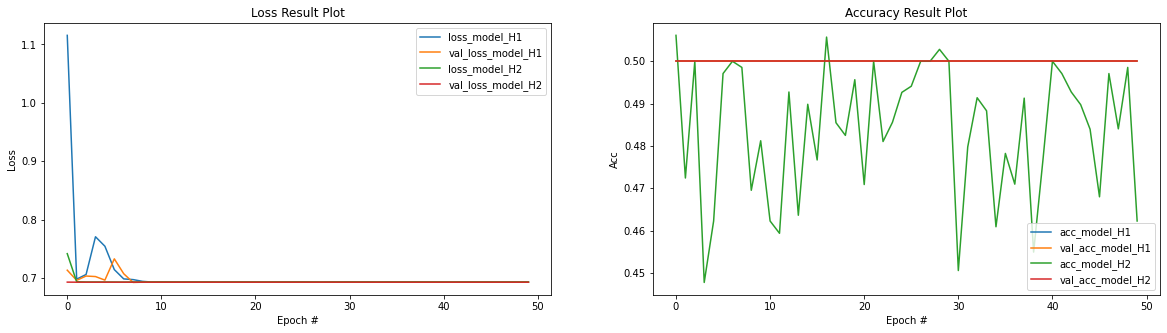

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)

ax1.plot(np.arange(0, 50), H1.history["loss"], label="loss_model_H1")
ax1.plot(np.arange(0, 50), H1.history["val_loss"], label="val_loss_model_H1")
ax1.plot(np.arange(0, 50), H2.history["loss"], label="loss_model_H2")
ax1.plot(np.arange(0, 50), H2.history["val_loss"], label="val_loss_model_H2")
ax1.set_title("Loss Result Plot")
ax1.set_xlabel("Epoch #")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(np.arange(0, 50), H1.history["acc"], label="acc_model_H1")
ax2.plot(np.arange(0, 50), H1.history["val_acc"], label="val_acc_model_H1")
ax2.plot(np.arange(0, 50), H2.history["acc"], label="acc_model_H2")
ax2.plot(np.arange(0, 50), H2.history["val_acc"], label="val_acc_model_H2")
ax2.set_title("Accuracy Result Plot")
ax2.set_xlabel("Epoch #")
ax2.set_ylabel("Acc")
ax2.legend()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

ypred = model1.predict(test_generator)
predictions = np.argmax(ypred, axis = 1)
print(classification_report(test_generator.classes,predictions))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       138
           1       0.00      0.00      0.00       138

    accuracy                           0.50       276
   macro avg       0.25      0.50      0.33       276
weighted avg       0.25      0.50      0.33       276



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 50.00%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


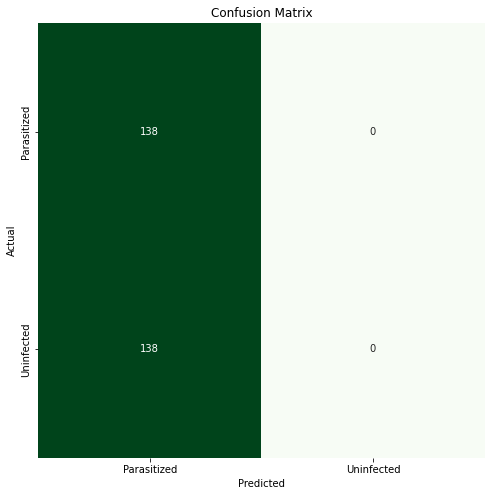

Classification Report:
----------------------
               precision    recall  f1-score   support

 Parasitized       0.50      1.00      0.67       138
  Uninfected       0.00      0.00      0.00       138

    accuracy                           0.50       276
   macro avg       0.25      0.50      0.33       276
weighted avg       0.25      0.50      0.33       276



In [ ]:
import seaborn as sns

acc = model1.evaluate(test_generator, verbose=0)[1]
print("Accuracy: {:.2f}%".format(acc * 100))

predictions = np.argmax(model1.predict(test_generator), axis=1)

cm = confusion_matrix(test_generator.labels, predictions, labels=[0, 1,])
clr = classification_report(test_generator.labels, predictions, labels=[0, 1], target_names=["Parasitized", "Uninfected"])

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Greens', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["Parasitized", "Uninfected"])
plt.yticks(ticks=[0.5, 1.5], labels=["Parasitized", "Uninfected"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

ypred = model2.predict(test_generator)
predictions = np.argmax(ypred, axis = 1)
print(classification_report(test_generator.classes,predictions))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       138
           1       0.00      0.00      0.00       138

    accuracy                           0.50       276
   macro avg       0.25      0.50      0.33       276
weighted avg       0.25      0.50      0.33       276



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 50.00%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


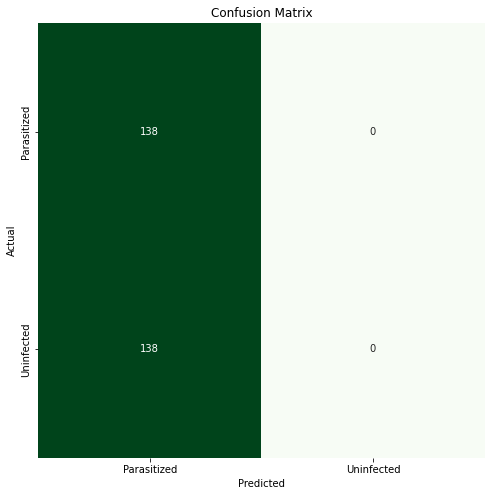

Classification Report:
----------------------
               precision    recall  f1-score   support

 Parasitized       0.50      1.00      0.67       138
  Uninfected       0.00      0.00      0.00       138

    accuracy                           0.50       276
   macro avg       0.25      0.50      0.33       276
weighted avg       0.25      0.50      0.33       276



In [ ]:
import seaborn as sns

acc = model2.evaluate(test_generator, verbose=0)[1]
print("Accuracy: {:.2f}%".format(acc * 100))

predictions = np.argmax(model2.predict(test_generator), axis=1)

cm = confusion_matrix(test_generator.labels, predictions, labels=[0, 1])
clr = classification_report(test_generator.labels, predictions, labels=[0, 1], target_names=["Parasitized", "Uninfected"])

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Greens', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["Parasitized", "Uninfected"])
plt.yticks(ticks=[0.5, 1.5], labels=["Parasitized", "Uninfected"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

### **SOAL 2 :**

---
Untuk mendapatkan penilaian pada soal ke 2 ini anda **wajib** mengerjakan soal nomer 1 terlebih dahulu. Tunjukkan kepada asisten bahwa anda telah menyelesaikan seluruh soal wajib diatas dan jelaskan dengan sebaik mungkin kepada asisten.


**Poin penilaian**
* Dapat menunjukkan dan menjelaskan hasil evaluasi masing-masing model yang digunakan.
* Dapat memvisualisasikan hasil evaluasi model dan menjelaskannya kepada asisten. 
* Menggunakan maptplotlib atau seaborn untuk visualisasi loss dan accuracy
* Menampilkan hasil evaluasi berupa nilai presisi, akurasi, recall, f1 score dan confusion matrix.
* Menggunakan tensorboard untuk visualisasi hasil evaluasi model menggunakan hyperparameter tuning.
* Menggunakan Hparam untuk tuning model.
* Hasil accuracy model terbaik >= 80% 
* Hasil loss model terbaik < 5%

In [ ]:
# Tulis Program Anda Disini!

## Kegiatan 2 **(berkelompok)**
30 poin

**Ketentuan Wajib**
* Tulis dokumentasi tugas kelompok anda dalam file README.md
* Cek daftar dataset seluruh praktikan [disini](https://docs.google.com/spreadsheets/d/1qyu5AVDhPhegpRTbNaDoq5qXX4_CX09Q7tYyD-fkF_c/edit?usp=sharing)
* Seluruh data dan progress pengerjaan tugas kelompok harus berada dalam github repository sebelum praktikum dimulai
* Tidak diperbolehkan berganti anggota kelompok selama satu semester ini
* Tidak diperbolehkan berganti repository selama mengerjakan tugas kelompok ini
* **Tidak diperbolehkan berganti dataset atau jurnal rujukan**
* Pastikan anda menggunakan akun github pribadi untuk melakukan commit dan push

**Penilaian**
* Keaktifan dalam tim
* Kontribusi dalam proyek dan tim
* Penerapan prinsip kerja Agile (sprint backlog dan report terdokumentasikan dengan baik)
* Progress pengerjaan tugas kelompok
* Problem solving masing - masing anggota terhadap kendala yang dialami
* Pemahaman masing - masing anggota tim terhadap tugas yang dikerjakan
* Pendokumentasian proyek "clear and clean documentation"

**Materi pendukung**
* [Project documentation](https://realpython.com/documenting-python-code)
* [Github readme](https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax)
* [Sprint backlog](https://www.lucidchart.com/blog/how-to-develop-a-product-backlog-in-agile)

**Tugas**

Melanjutkan tugas kelompok di modul 1 sampai 3 sekarang kerjakan beberapa poin berikut untuk didemokan kepada asisten masing-masing.

*   Melakukan proses preprocessing dataset dengan ketentuan:
 * augmentasi data menggunakan ImageDataGenerator
 * balancing dataset menggunakan teknik oversampling / downsampling
 * splitting dataset menjadi (75% train, 14% validation, 1% test)
*   Melakukan training beberapa skema model menggunakan model CNN sederhana buatan sendiri **(minimal 2 model)** *tidak diperbolehkan menggunakan transfer learning* 
 * Menerapkan proses Convolution
 * Menerapkan proses Pooling
 * Menerapkan Dropout
 * Menerpakan BatchNormalization
 * Menerapkan learning rate scheduller
 * Menggunakan hyperparameter tuning
 * Minimal 100 epoch per model
* Menyimpan model yang telah di training kedalam file `.json` dan weight kedalam file `.h5` [Lihat disini](https://www.tensorflow.org/guide/keras/save_and_serialize)
*  Mencatat hasil perkembangan tugas kelompok dalam file `sprint_project.xlsx` tandai masing-masing task dengan status **Done** *untuk task yang telah selesai dikerjakan*, **On Going** *untuk task yang dalam proses pengerjaan*, **Waiting** *untuk task yang belum atau akan dikerjakan*
* Pastikan anda menulis tanggal mulai dan tanggal selesai masing-masing task dengan benar
* Pastikan anda menulis penanggung jawab masing-masing task (Penanggung jawab bertugas menyelesaikan dan menuntaskan masing-masing task yang diberikan)
* `commit` dan `push` seluruh perkerjaan yang anda lakukan kedalam branch pribadi dalam repository tugas kelompok yang telah anda buat sebelumnya.
* Presentasikan kepada asisten tentang apa yang anda lakukakan selama mengerjakan tugas kelompok ini. Ceritakan tentang tugas masing-masing anggota,  kendala dalam mengerjakan tugas sampai solusi yang anda lakukan saat mengerjakan tugas kelompok ini.

